In [1]:
# Use the octogonal 3-5-5-5-3 kernel.

# Write programs which do gray scale morphological dilation, erosion, opening, and closing on a gray scale image.

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
#用 pyplot 使 Img 顯示在 jupyter notebook 中
def imshow(img):
    plt.imshow(img, cmap='Greys_r',vmin = 0, vmax = 255)
    plt.show()
#Binarize Lena with the threshold 128
img2 = img.copy()

In [20]:
kernel = np.ones((5,5), np.uint8) 
kernel[0][0] = kernel[0][4] = kernel[4][0] = kernel[4][4] = 0

def dilate(img, kernel):
    img_dilation = np.zeros([len(img),len(img[0])],dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            maxx = 0
            for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                    if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                        if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1:
                            if img[k][l] > maxx:
                                maxx = img[k][l]
            img_dilation[i][j] = maxx
    return  img_dilation

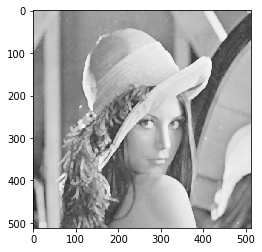

In [21]:
img_dilation = dilate(img2, kernel)
cv2.imwrite('Dilation.png', img_dilation)
imshow(img_dilation)

In [22]:
if (img_dilation == cv2.dilate(img2, kernel)).all():
    print("correct")
else:
    print("Wrong")

correct


In [29]:
def erode(img, kernel):
    img_erosion = np.zeros([len(img),len(img[0])],dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            minn = 255
            for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                    if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                        if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1:
                            if img[k][l] < minn:
                                minn = img[k][l]
            img_erosion[i][j] = minn
    return  img_erosion

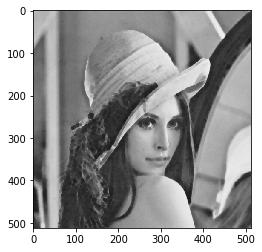

In [30]:
img_erosion = erode(img2, kernel)
cv2.imwrite('Erosion.png', img_erosion)
imshow(img_erosion)

In [31]:
img_erosion_cv = cv2.erode(img2, kernel)
if (img_erosion == img_erosion_cv).all():
    print("correct!")
else:
    print("False")
count = 0
for i in range(512):
    for j in range(512):
        if not(img_erosion[i][j] == img_erosion_cv[i][j]).all():
            count += 1
print(count)

correct!
0


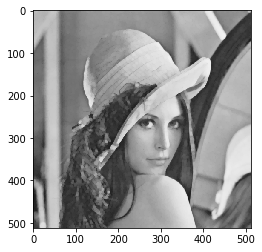

In [33]:
def opening(img, kernel):
    img_opening = erode(img, kernel)
    img_opening = dilate(img_opening, kernel)
    return img_opening
img_opening = opening(img2, kernel)
cv2.imwrite('Opening.png', img_opening)
imshow(img_opening)

In [36]:
img_opening_cv = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)
if (img_opening == img_opening_cv).all():
    print("correct!")
else:
    print("False")

correct!


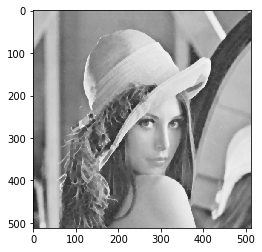

In [34]:
def closing(img, kernel):
    img_closing = dilate(img, kernel)
    img_closing = erode(img_closing, kernel)
    return img_closing
img_closing = closing(img2, kernel)
cv2.imwrite('Closing.png', img_closing)
imshow(img_closing)

In [37]:
img_closing_cv = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
if (img_closing == img_closing_cv).all():
    print("correct!")
else:
    print("False")

correct!
